In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/Ames_Housing_Data.csv")

Feature Descriptions

In [3]:
with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2

We already have an index hence we don't need the PID column

In [5]:
df = df.drop('PID', axis=1)

In [9]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

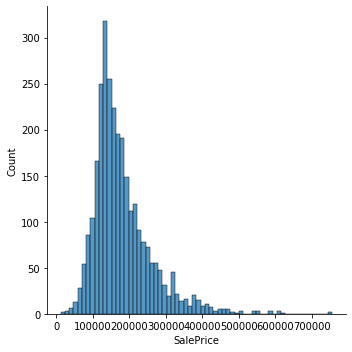

In [12]:
sns.displot(df['SalePrice'])

It looks like 'Overall Qual' have the highest correlation with SalePrice. Let's take a look at it

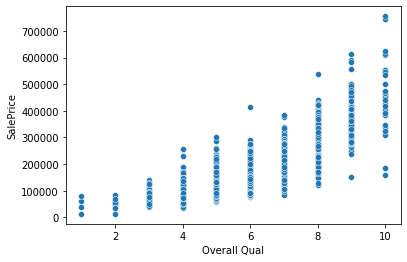

In [13]:
sns.scatterplot(data = df, x = 'Overall Qual', y = 'SalePrice')

There may be potentially 3 outliers where the Overall Qual is greater than 8 but their sale price is very low compared to similar data for their Overall Qual

In [14]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Let's take a look at the next highest correlated value to see if we can find further insights

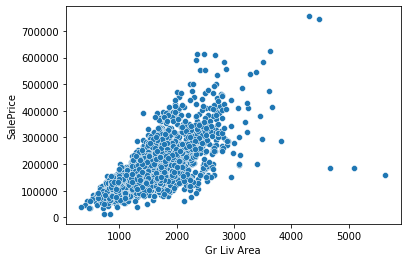

In [15]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')

Here we also see 3 outliers passs 4000 for 'Gr Liv Area', let's see what are they.

In [17]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


There are 3 rows that coincide for 'Gr Liv Area' > 4000 and 'SalePrice' < 300000 and for 'Overall Qual' > 8 and 'SalePrice' < 200000. They are rows 1498, 2180 and 2181. Let's remove these 3 outliers.

In [18]:
outlier_index = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)].index

In [22]:
df = df.drop(outlier_index, axis=0)

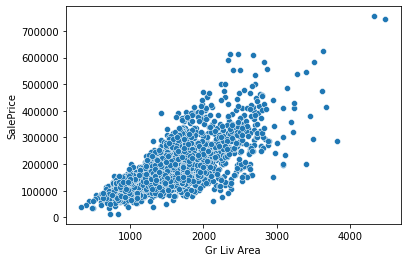

In [23]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')

In [25]:
df.to_csv("C:/Users/kaile/Desktop/Ames_outliers_removed.csv",index=False)

In [26]:
len(df.columns)

80

Dealing with Missing Data

In [28]:
df.isnull().sum()

MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2729
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

Let's calculate the percentage of missing data for each attribute

In [29]:
(df.isnull().sum() / len(df)) * 100

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.740690
Lot Area           0.000000
Street             0.000000
Alley             93.235395
Lot Shape          0.000000
Land Contour       0.000000
Utilities          0.000000
Lot Config         0.000000
Land Slope         0.000000
Neighborhood       0.000000
Condition 1        0.000000
Condition 2        0.000000
Bldg Type          0.000000
House Style        0.000000
Overall Qual       0.000000
Overall Cond       0.000000
Year Built         0.000000
Year Remod/Add     0.000000
Roof Style         0.000000
Roof Matl          0.000000
Exterior 1st       0.000000
Exterior 2nd       0.000000
Mas Vnr Type       0.785787
Mas Vnr Area       0.785787
Exter Qual         0.000000
Exter Cond         0.000000
Foundation         0.000000
Bsmt Qual          2.733174
                    ...    
Bedroom AbvGr      0.000000
Kitchen AbvGr      0.000000
Kitchen Qual       0.000000
TotRms AbvGrd      0.000000
Functional         0

Plotting it out to get a visual

In [30]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [31]:
percent_nan = percent_missing(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

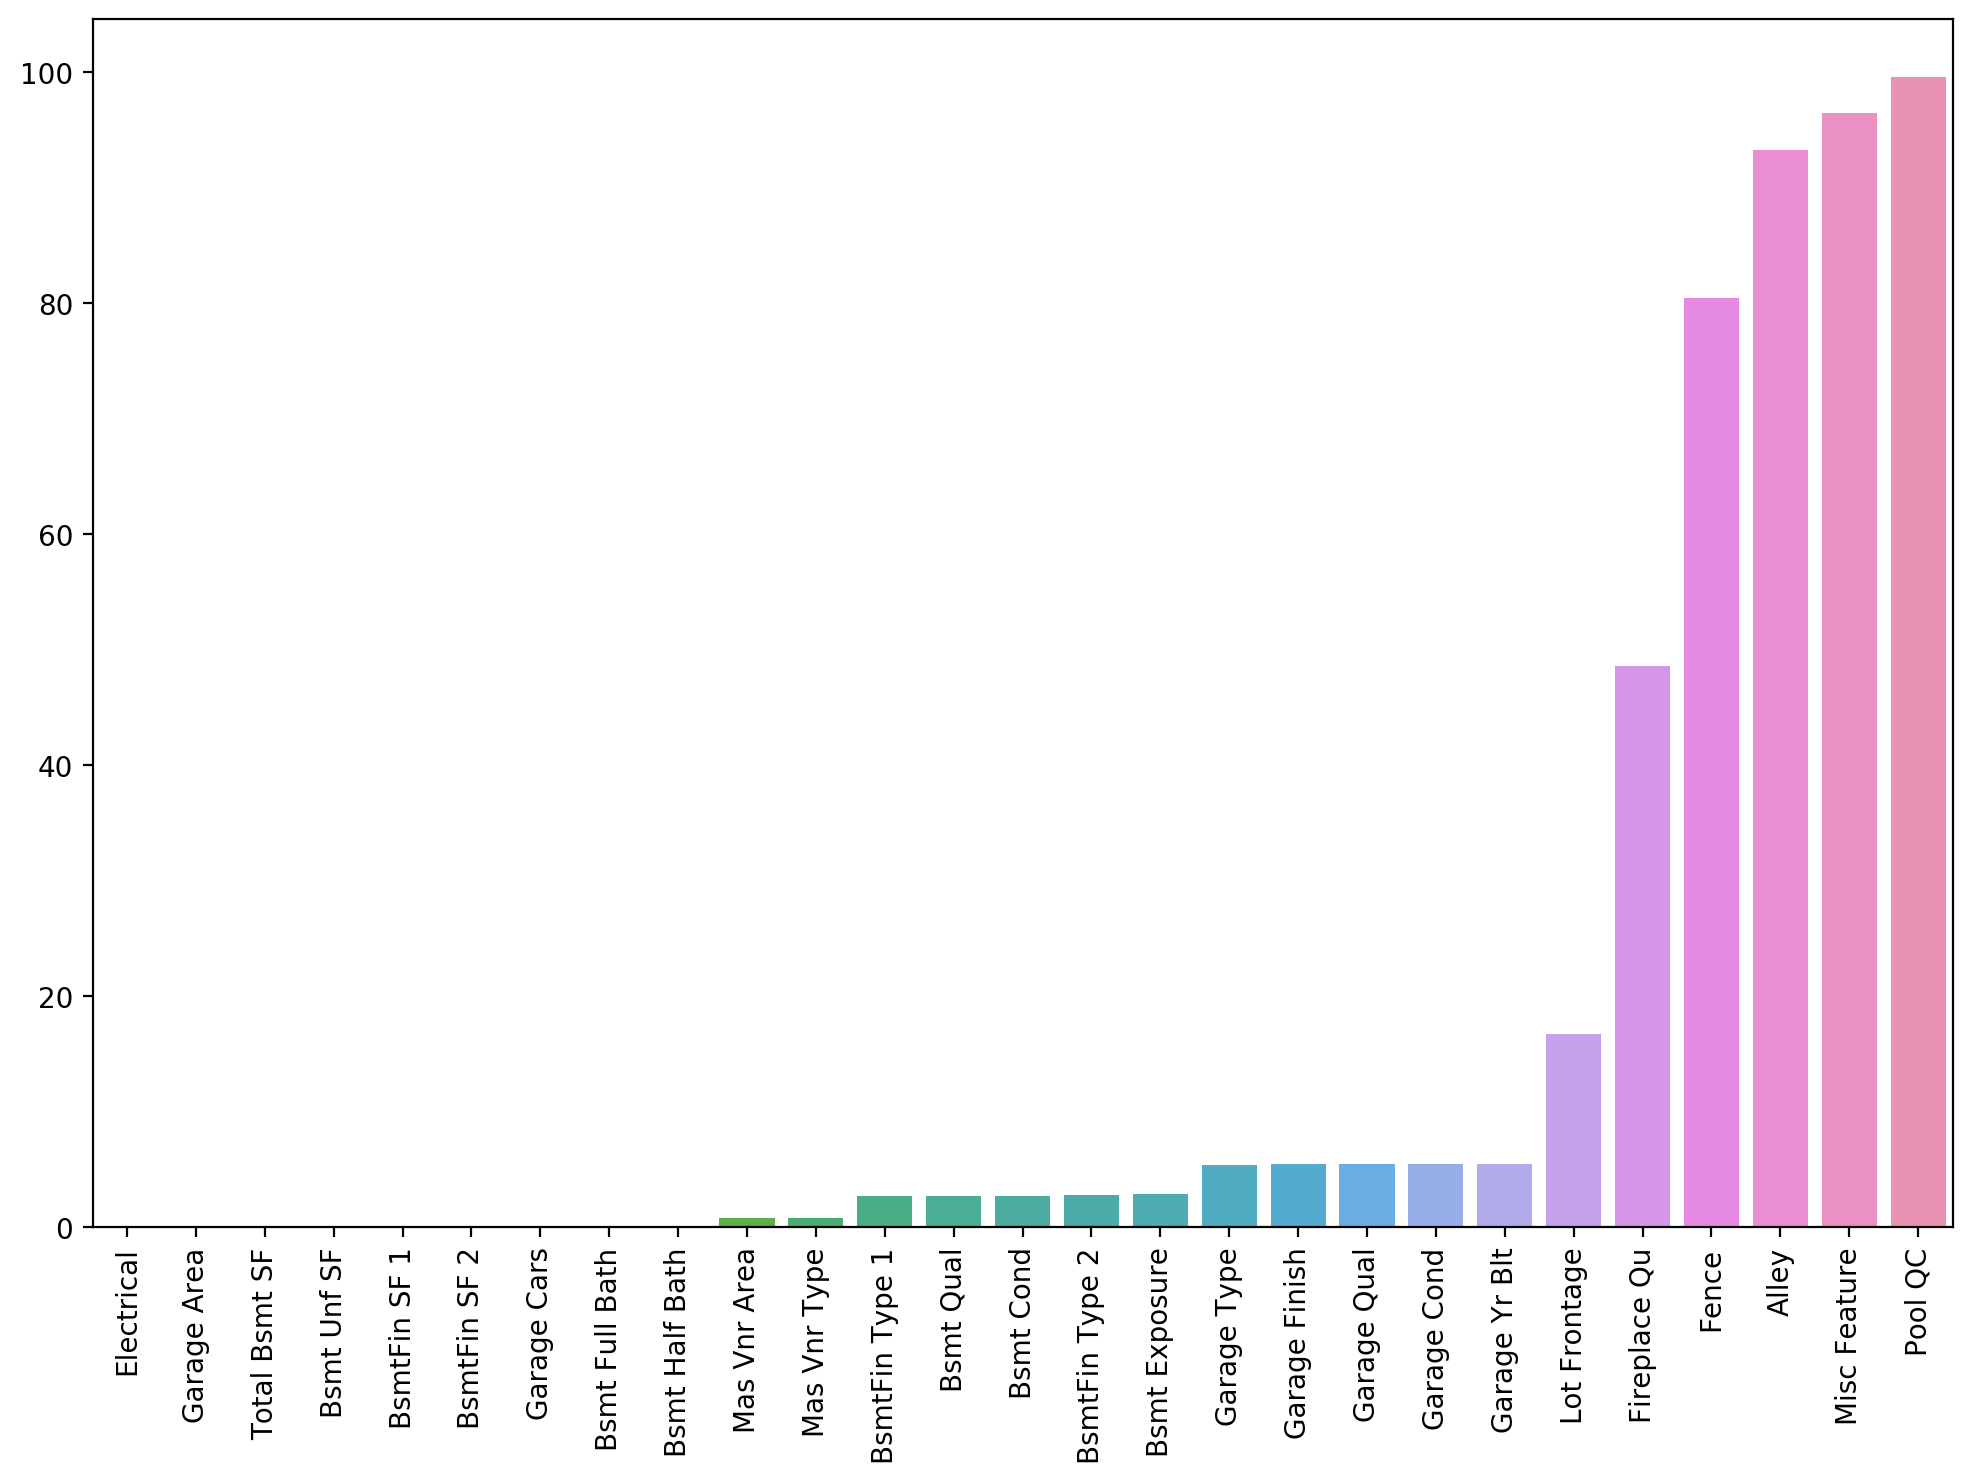

In [39]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

In [40]:
len(df)

2927

In [41]:
1/100 * len(df)

29.27

If less than 1% of the data is missing, we could just drop those rows. Removing 29 rows from 2927 rows is not going to affect performance of the model that significantly.

(0, 1)

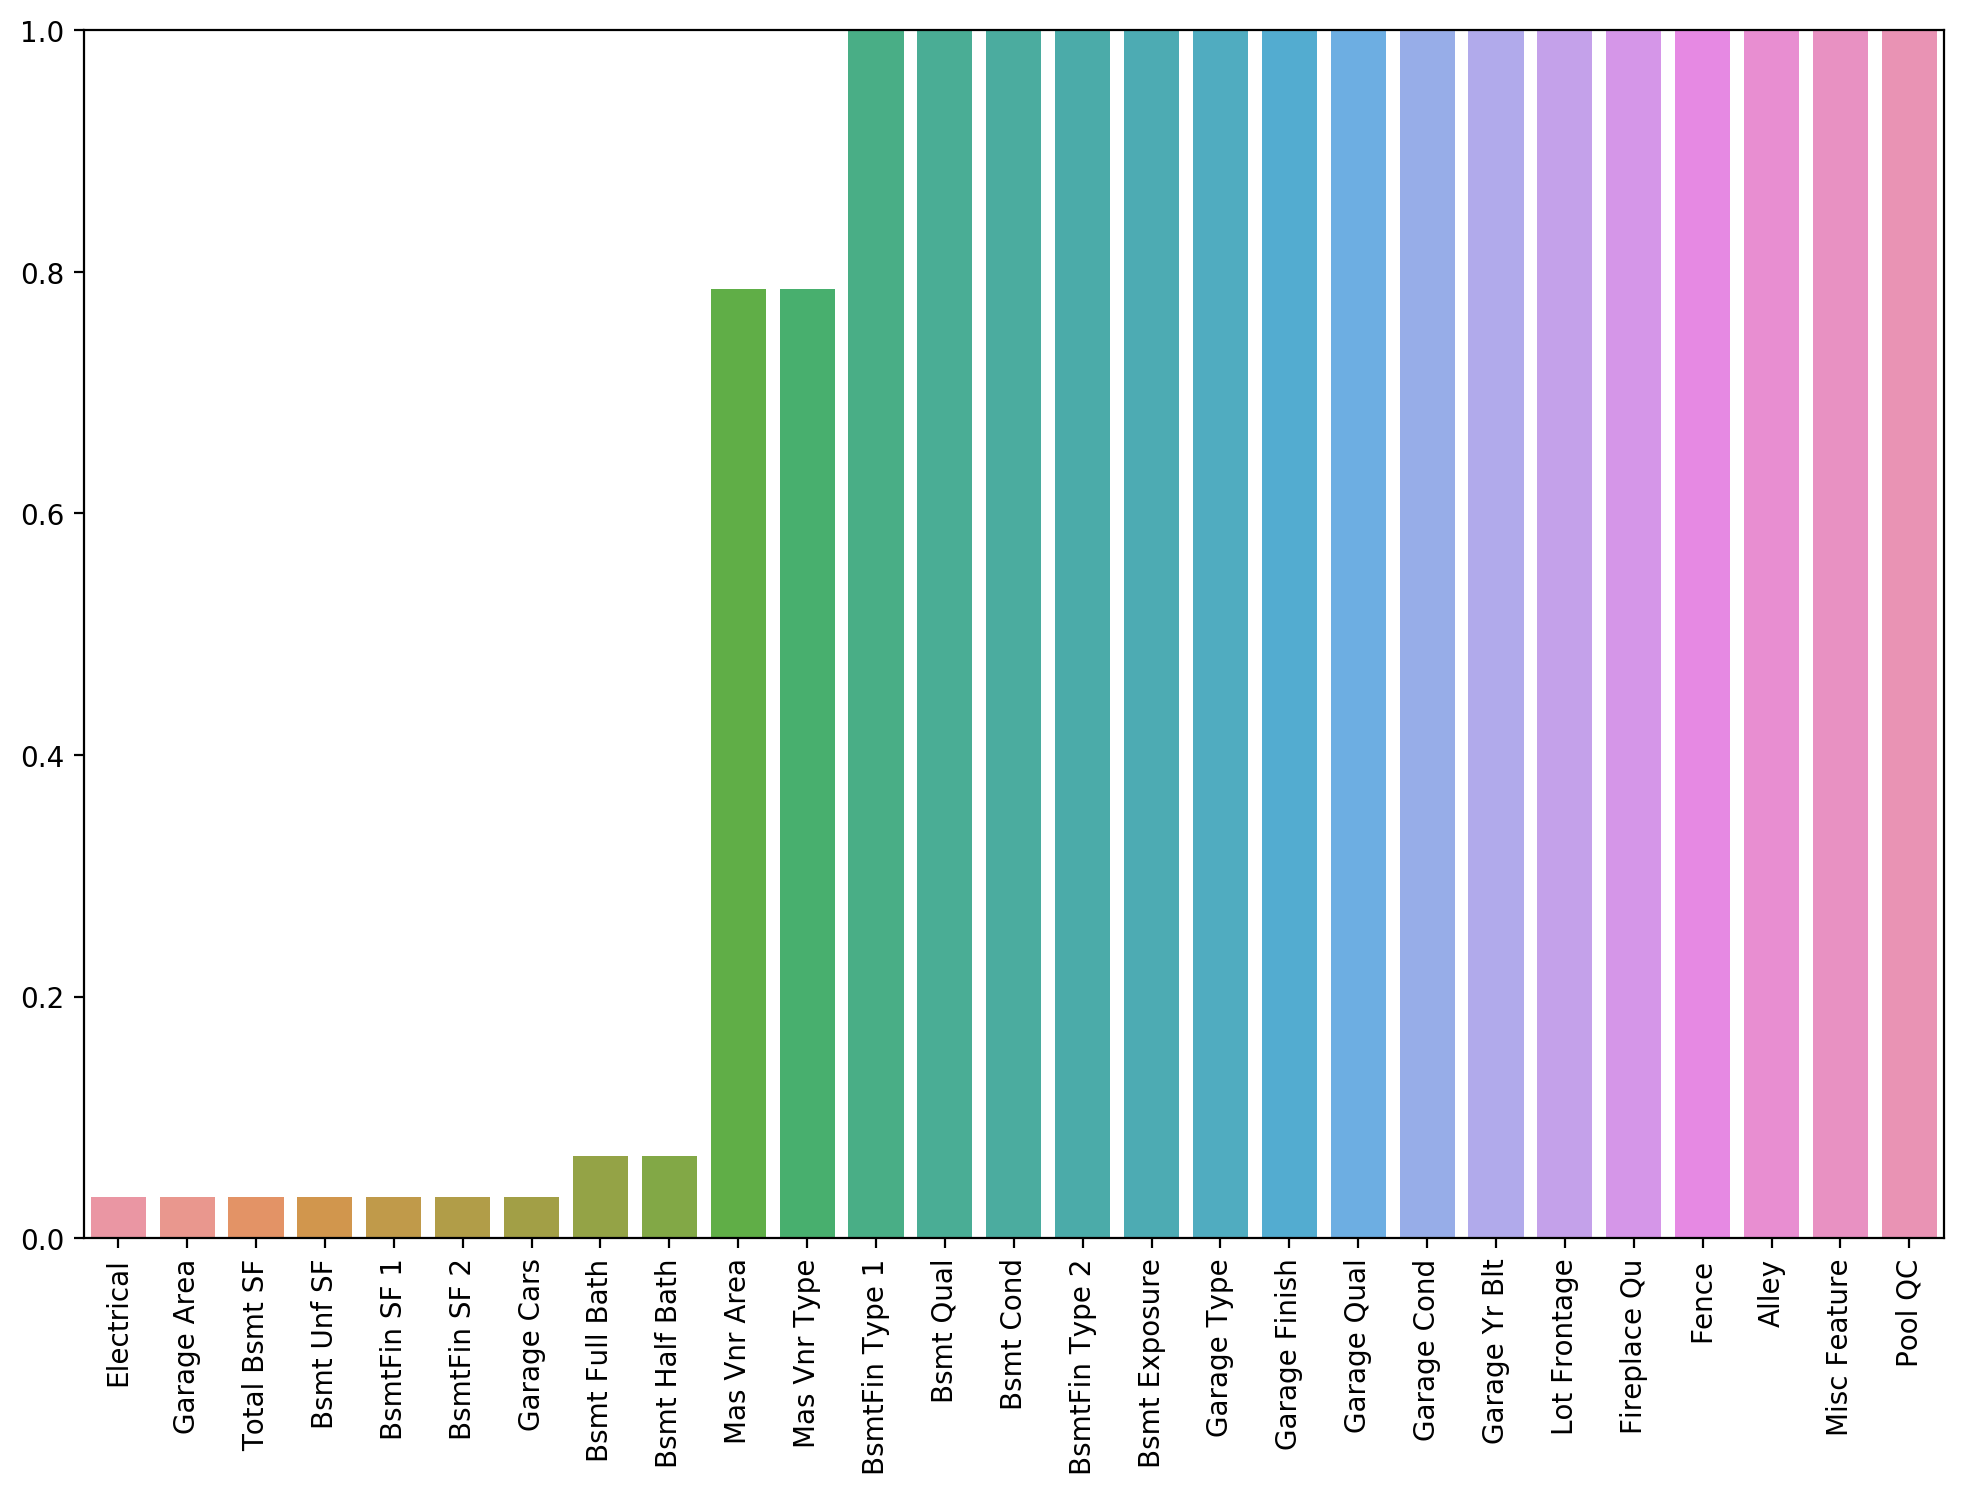

In [43]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [45]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [46]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [47]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [49]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


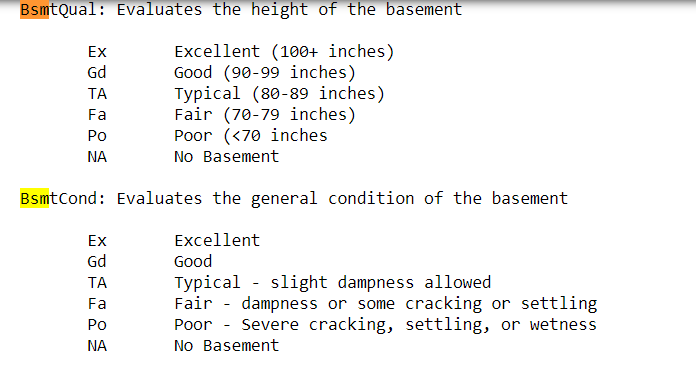

Here we see that from the Dataset description, null values for all things basement actually mean "No Basement". This would mean that these rows are not actually missing data but rather there isnt a basement in the dataset. We could instead fill all the null values for numeric roles with 0 and with string roles with None

In [50]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 80 columns):
MS SubClass        2927 non-null int64
MS Zoning          2927 non-null object
Lot Frontage       2437 non-null float64
Lot Area           2927 non-null int64
Street             2927 non-null object
Alley              198 non-null object
Lot Shape          2927 non-null object
Land Contour       2927 non-null object
Utilities          2927 non-null object
Lot Config         2927 non-null object
Land Slope         2927 non-null object
Neighborhood       2927 non-null object
Condition 1        2927 non-null object
Condition 2        2927 non-null object
Bldg Type          2927 non-null object
House Style        2927 non-null object
Overall Qual       2927 non-null int64
Overall Cond       2927 non-null int64
Year Built         2927 non-null int64
Year Remod/Add     2927 non-null int64
Roof Style         2927 non-null object
Roof Matl          2927 non-null object
Exterior 1st       

In [60]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [61]:
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [62]:
percent_nan = percent_missing(df)

(0, 1)

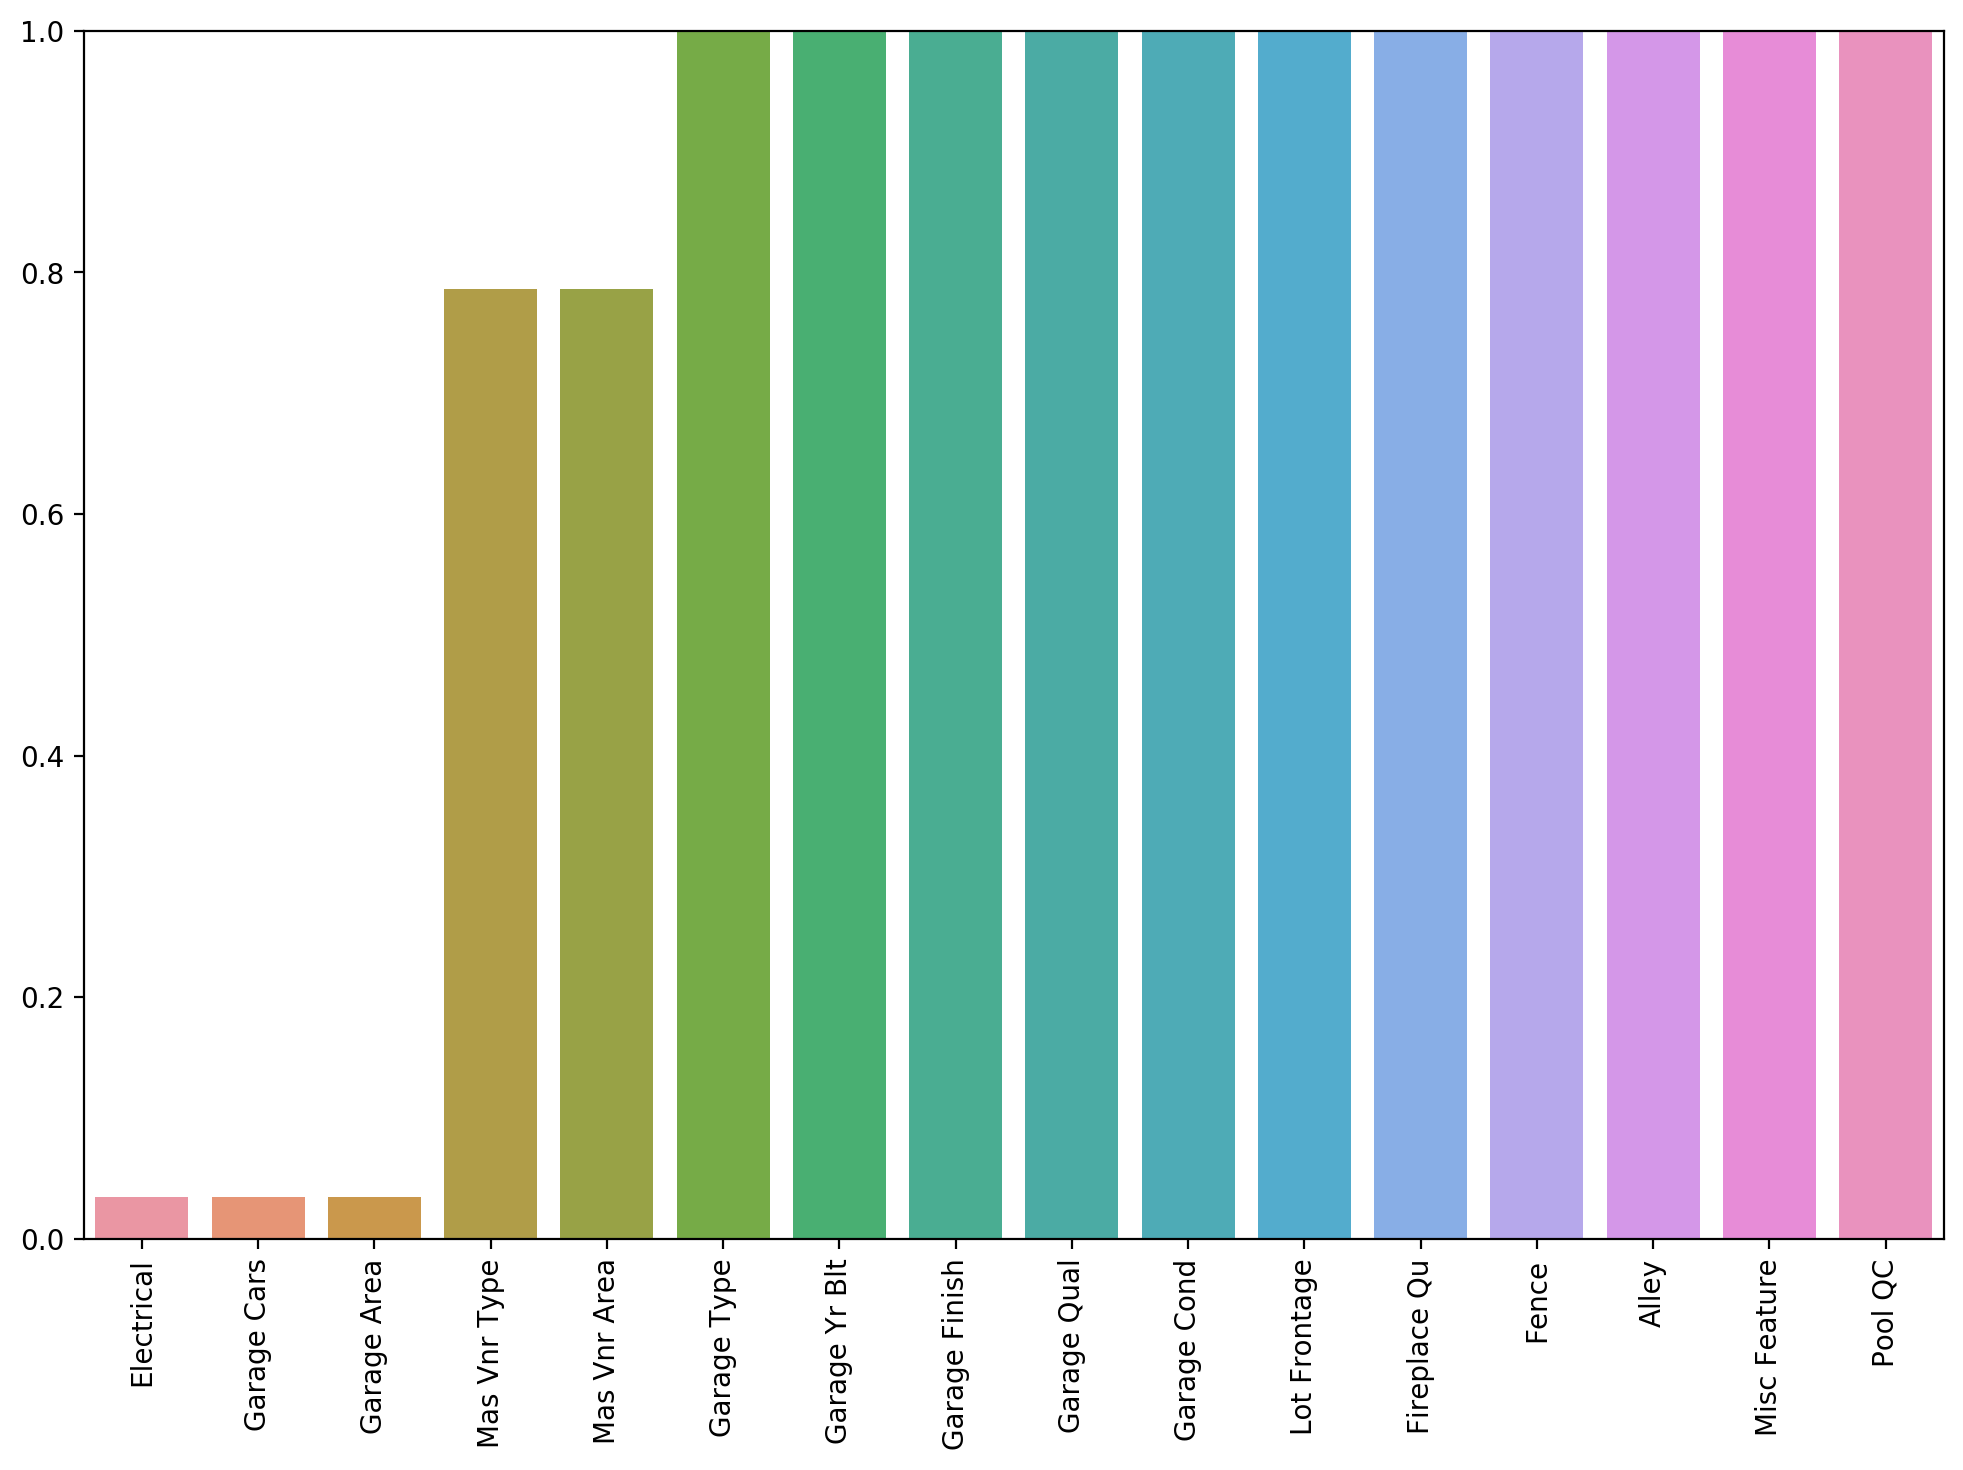

In [63]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

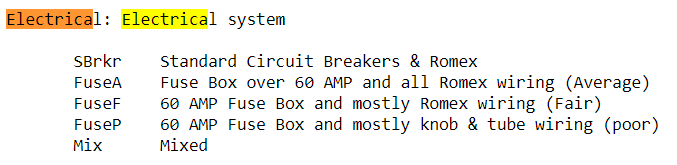

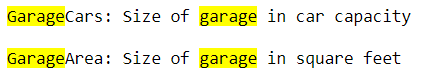

In [65]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [66]:
df[df['Garage Cars'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [64]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [67]:
len(df)

2927

In [76]:
df = df.dropna(axis=0, subset=['Electrical', 'Garage Area'])

In [78]:
percent_nan = percent_missing(df)

(0, 1)

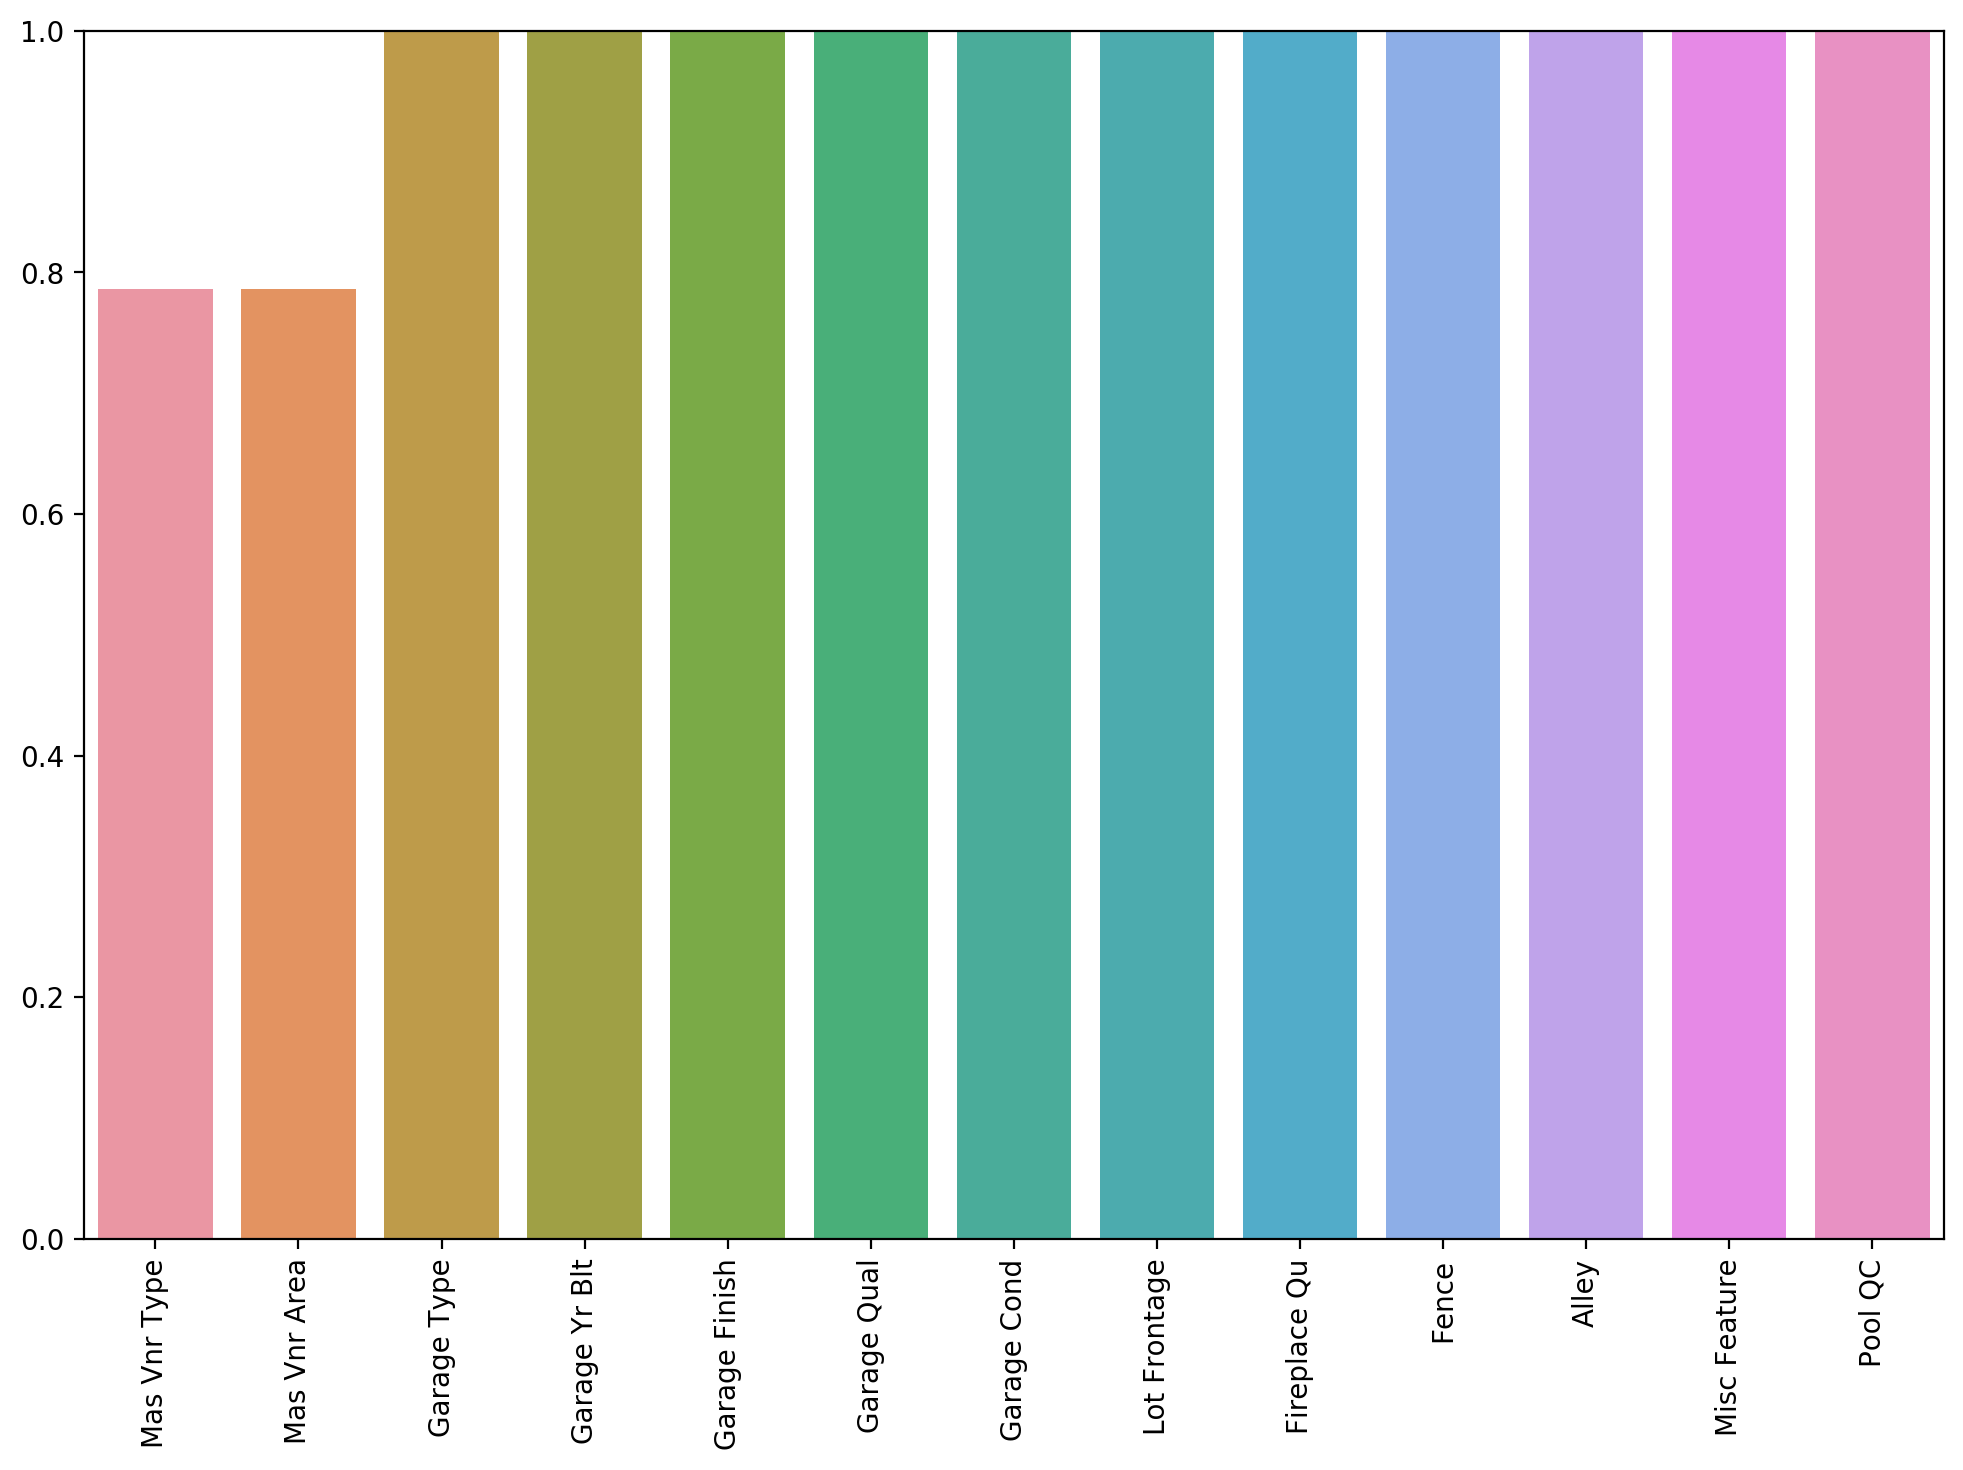

In [79]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

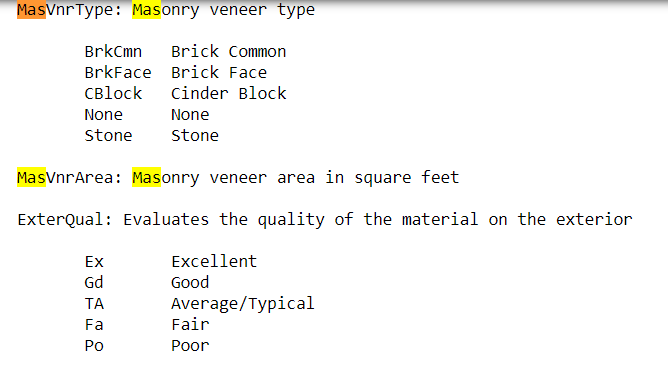

In [86]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna('None')

C:\Users\kaile\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

C:\Users\kaile\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
percent_nan = percent_missing(df)

(0, 100)

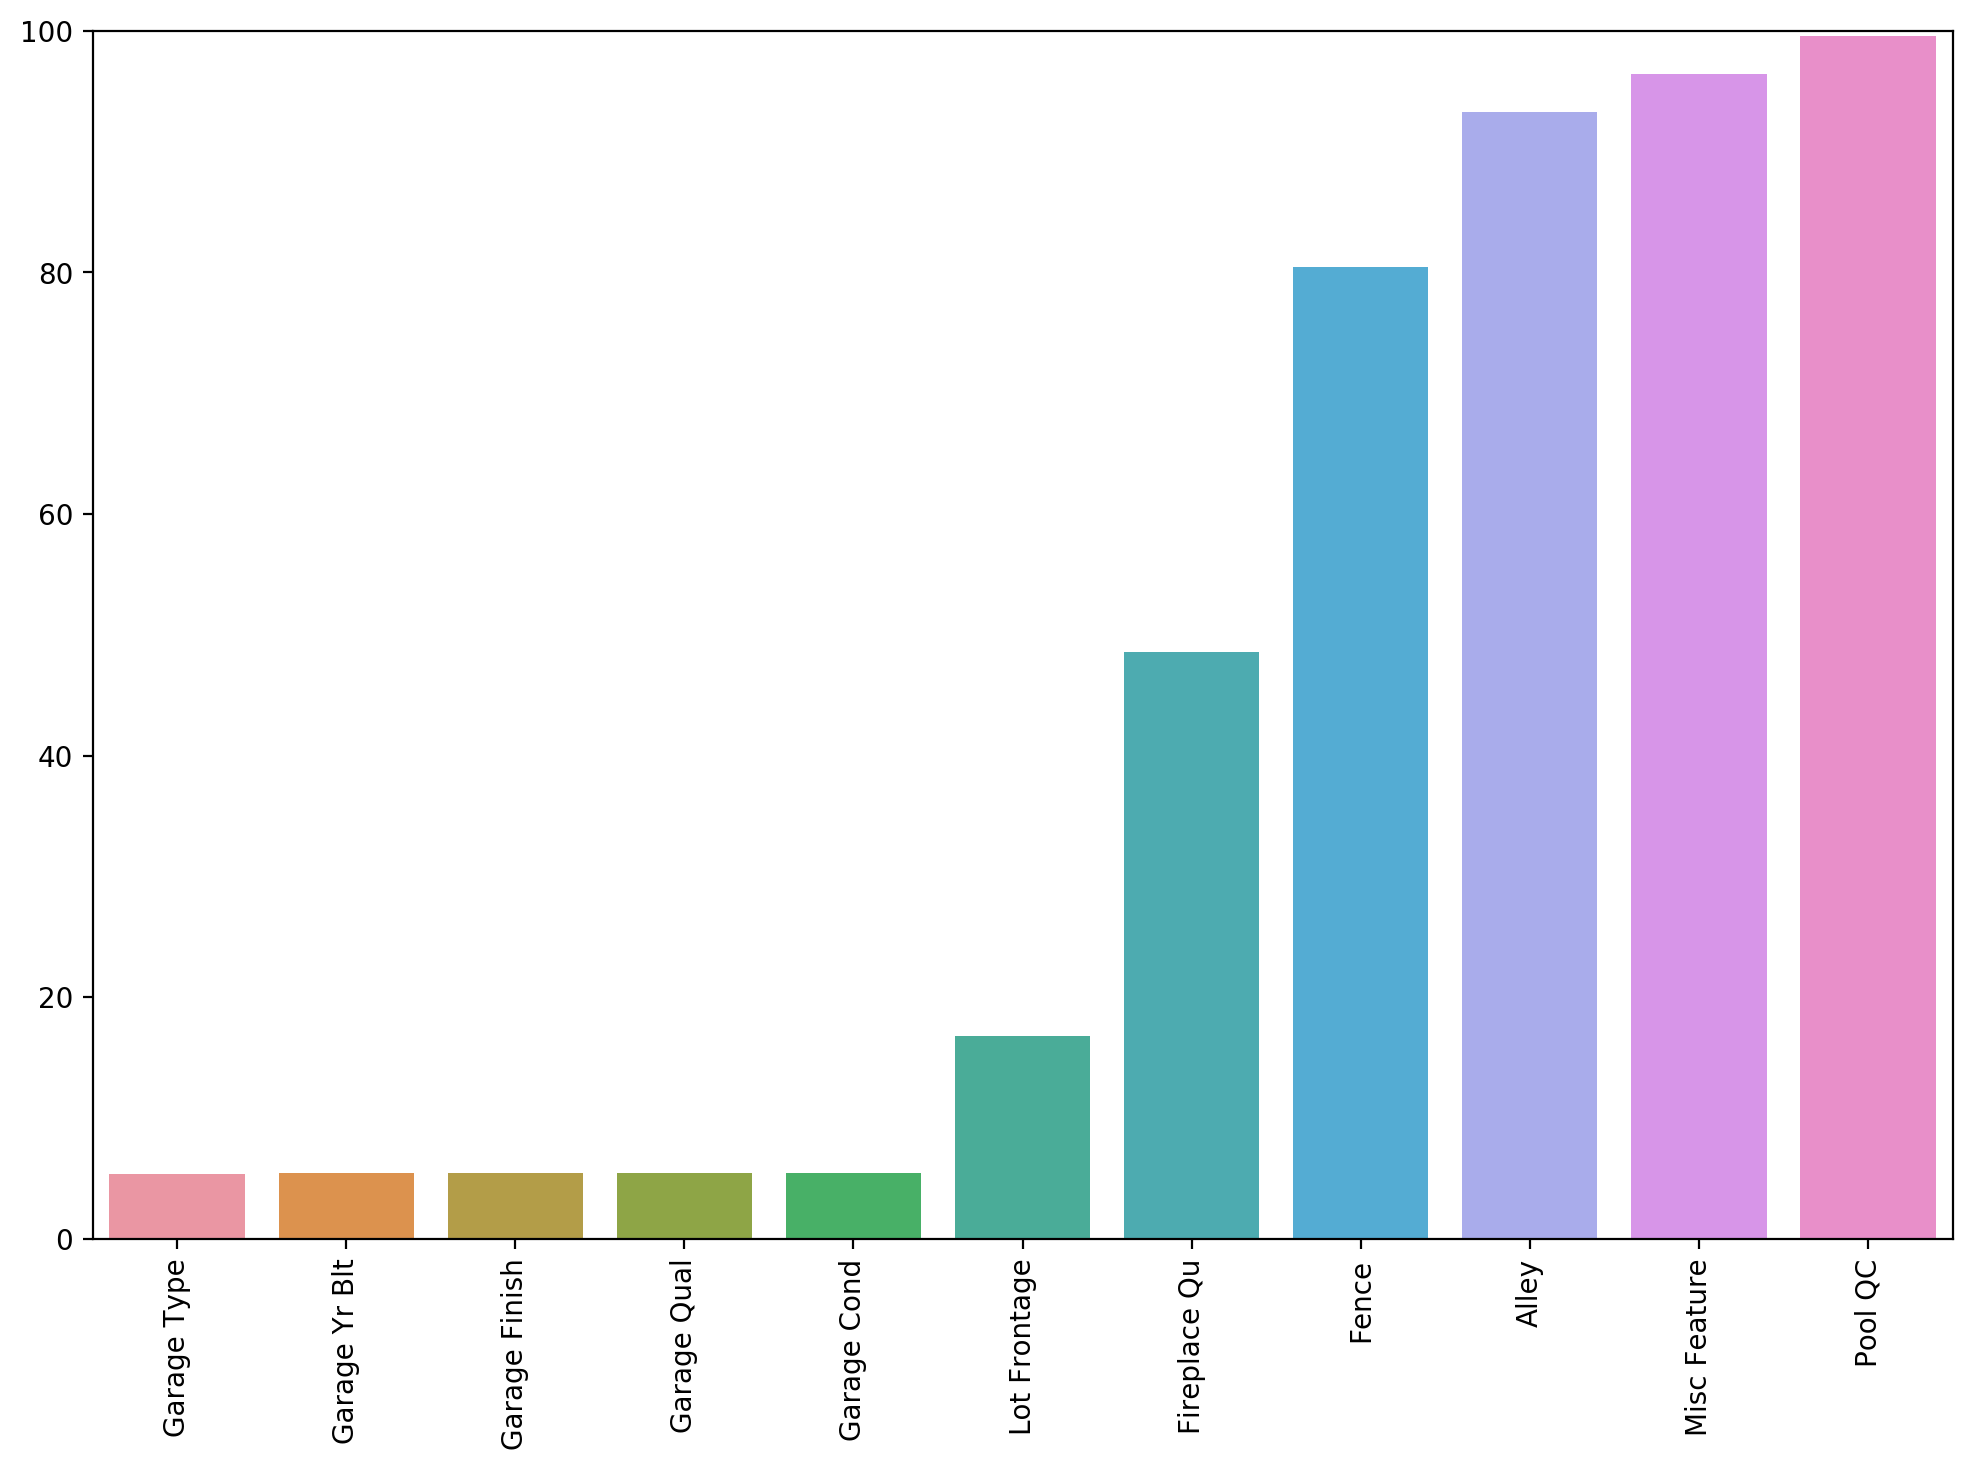

In [92]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,100)

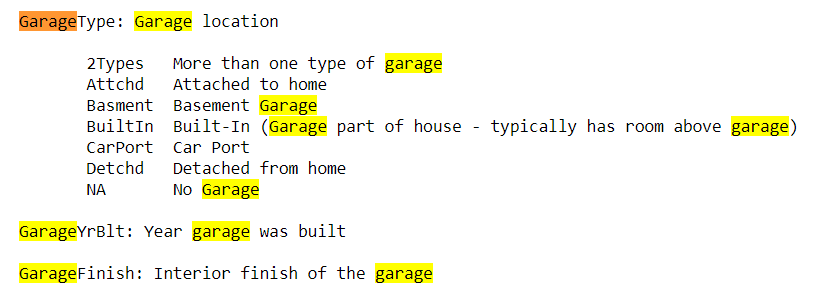

In [101]:
df[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']].dtypes

Garage Type       object
Garage Yr Blt    float64
Garage Finish     object
Garage Qual       object
Garage Cond       object
dtype: object

In [102]:
garage_num_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[garage_num_cols] = df[garage_num_cols].fillna('None')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

C:\Users\kaile\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\kaile\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
percent_nan = percent_missing(df)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

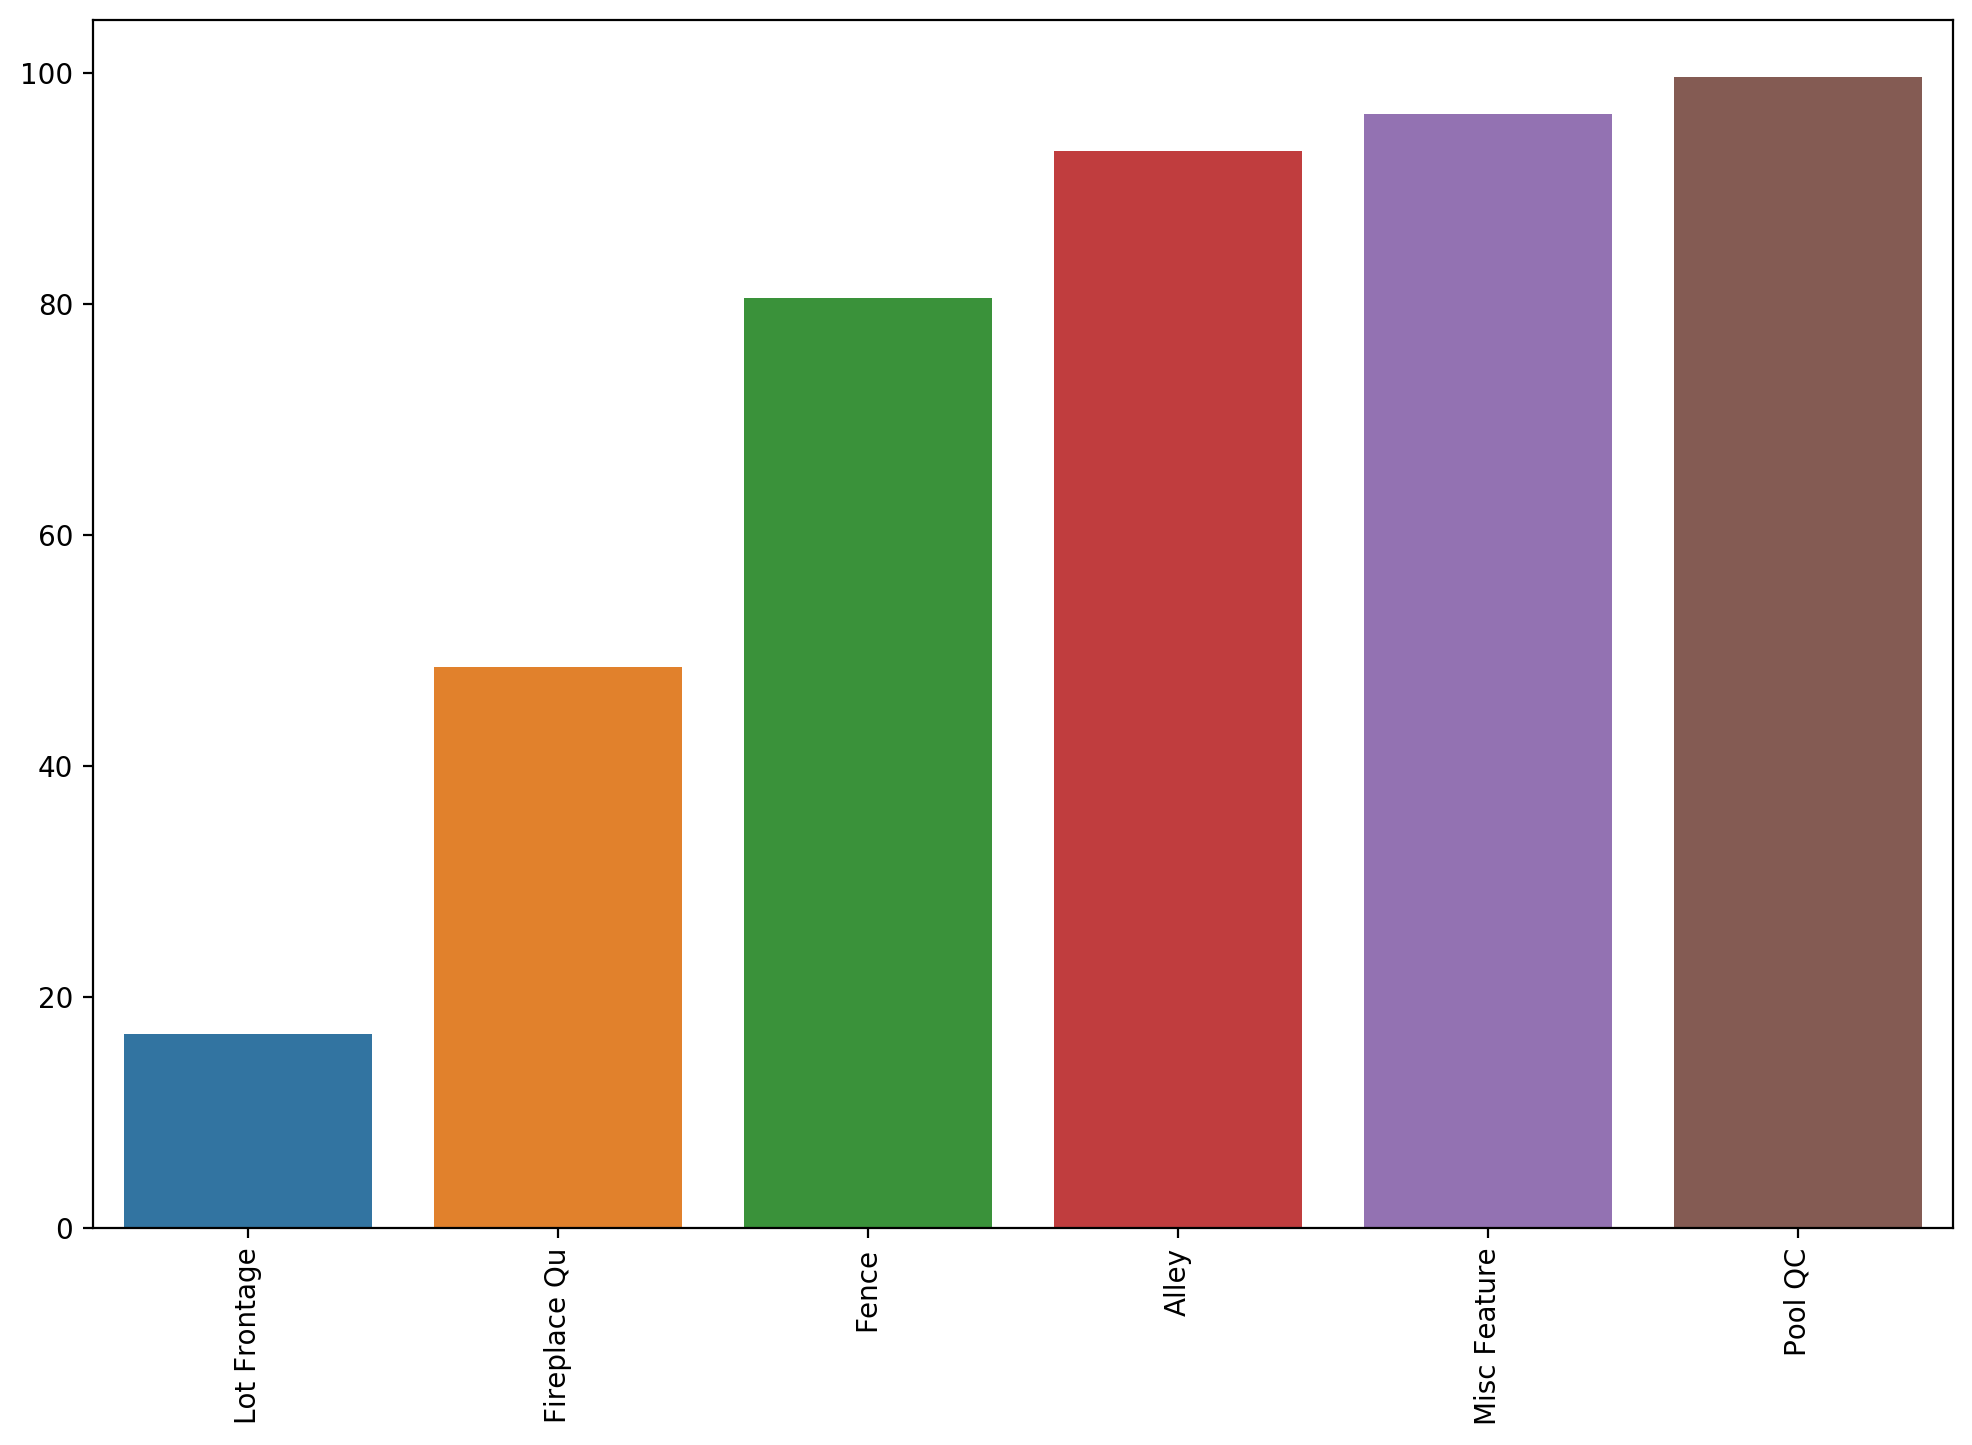

In [104]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

Since Fence, Alley, Mis Feature and Pool QC have more than 80 % of their rows missing, we shall drop these columns.

In [106]:
df = df.drop(['Fence', 'Alley', 'Misc Feature', 'Pool QC'], axis=1)

In [107]:
percent_nan = percent_missing(df)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

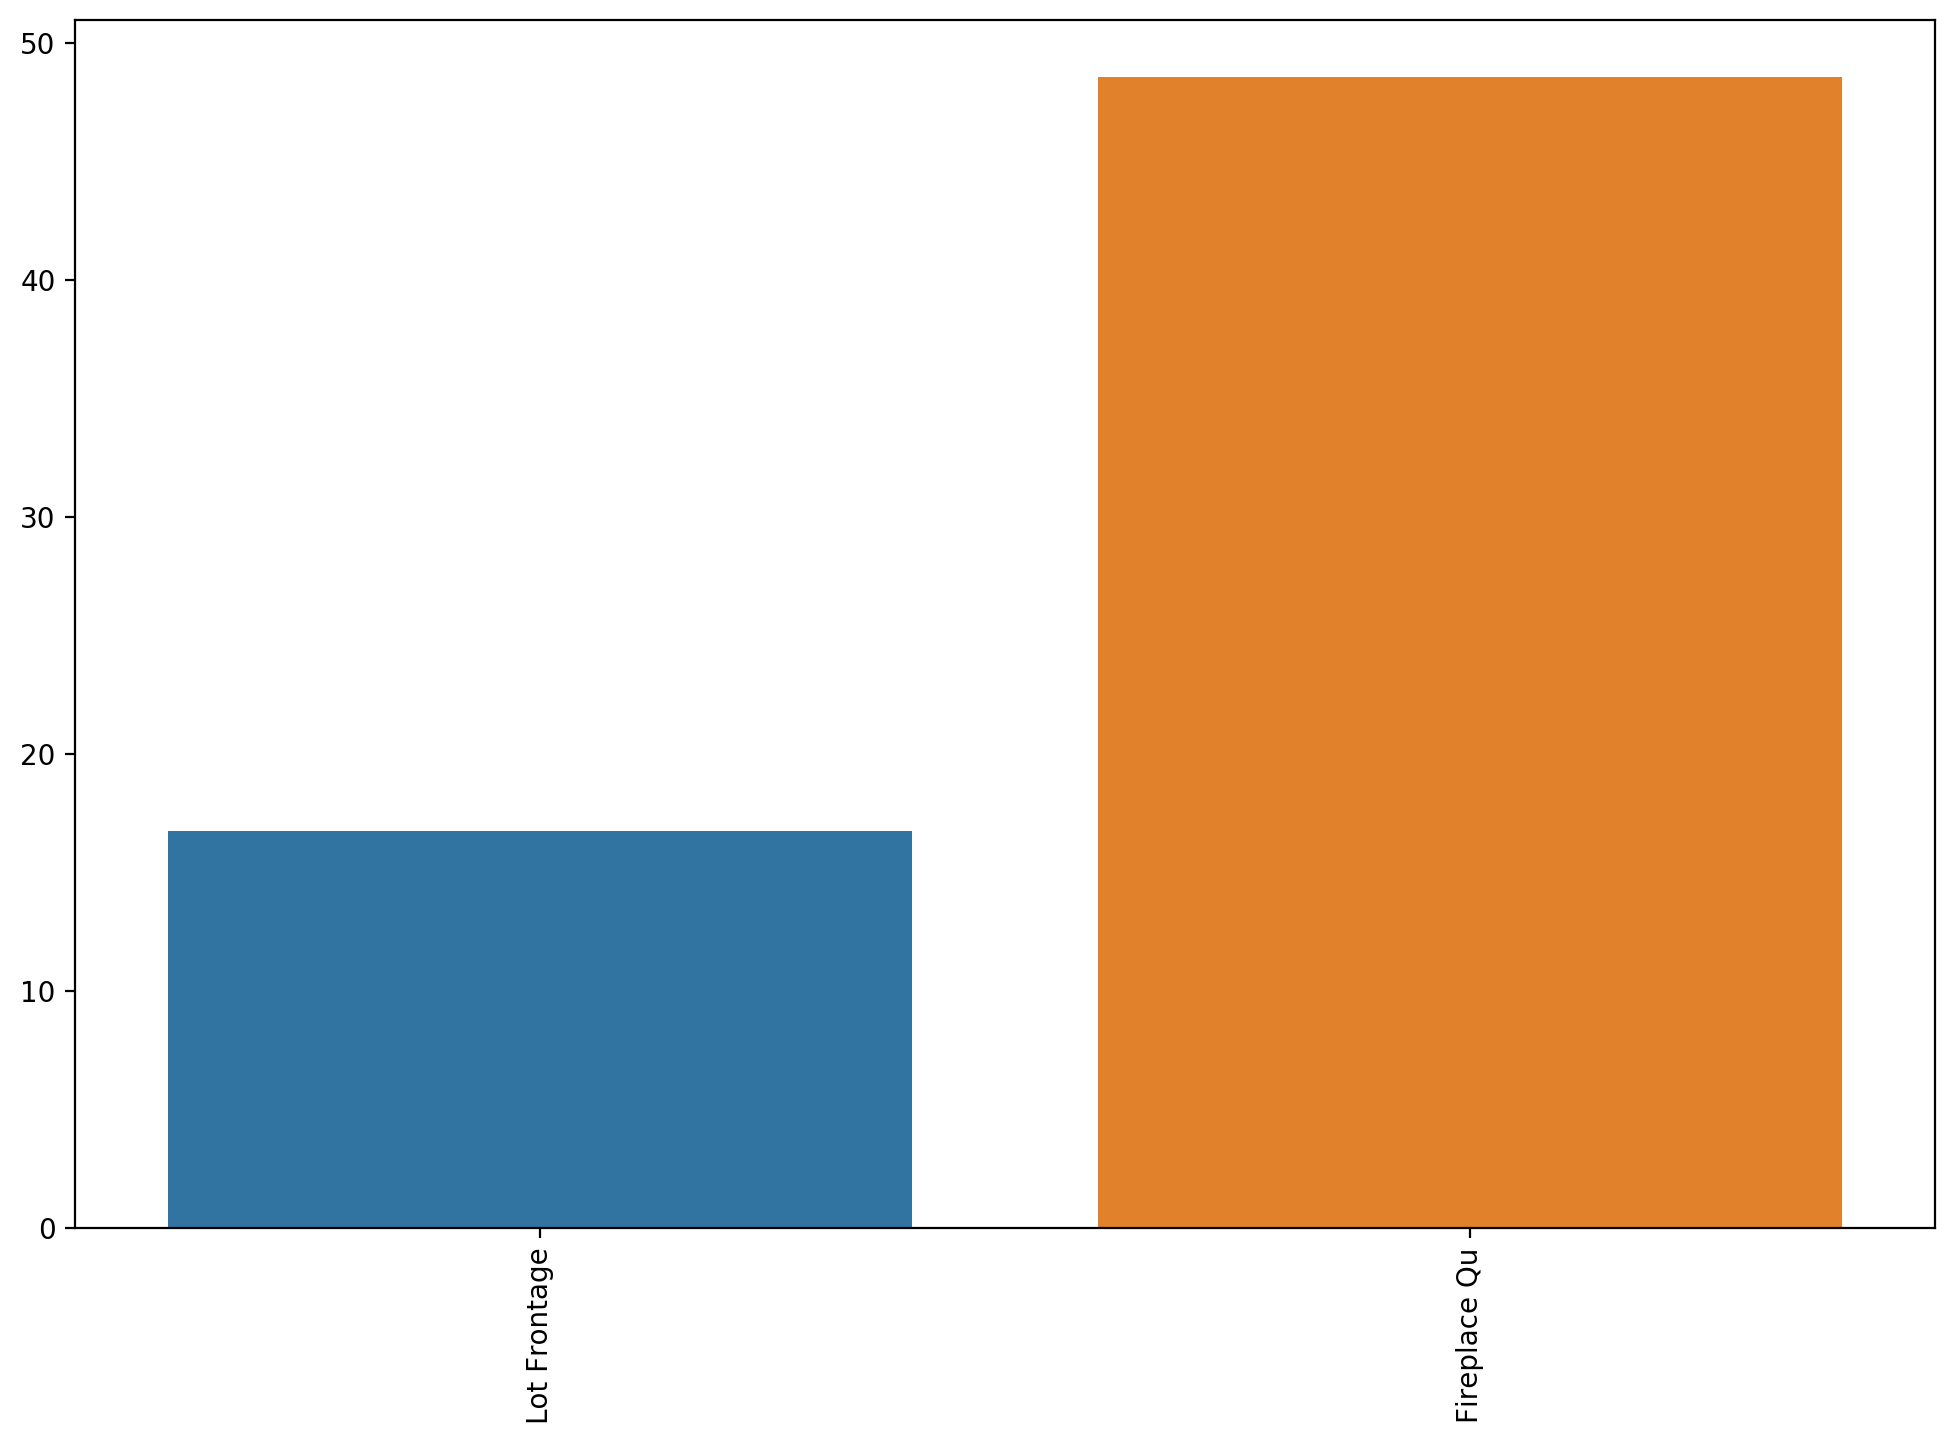

In [108]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

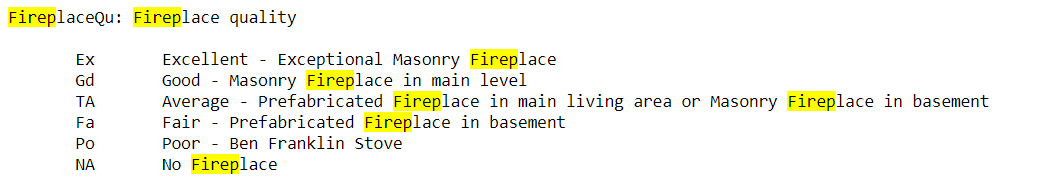

In [109]:
df['Fireplace Qu'].dtype

dtype('O')

In [110]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [113]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

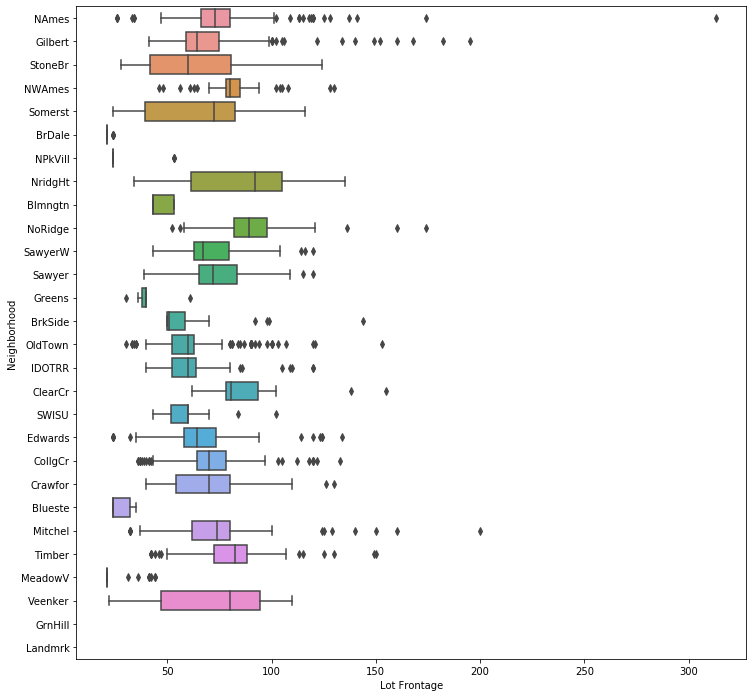

In [115]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=df, x='Lot Frontage', y='Neighborhood', orient='h')

In [119]:
df.groupby('Neighborhood')['Lot Frontage'].apply(lambda value: value.fillna(value.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
5        78.000000
6        41.000000
7        43.000000
8        39.000000
9        60.000000
10       75.000000
11       74.207207
12       63.000000
13       85.000000
14       62.173913
15       47.000000
16      152.000000
17       88.000000
18      140.000000
19       85.000000
20      105.000000
21       85.000000
22       64.549383
23       75.210667
24       75.210667
25       65.000000
26       70.000000
27       70.000000
28       26.000000
29       21.000000
           ...    
2900     95.000000
2901     88.000000
2902     88.000000
2903    125.000000
2904     78.000000
2905     32.000000
2906     32.000000
2907     90.000000
2908     41.000000
2909     41.000000
2910     42.000000
2911     58.000000
2912     75.144444
2913     21.000000
2914     21.000000
2915     80.000000
2916     21.000000
2917     21.000000
2918     21.000000
2919     21.000000
2920     21.000000
2921     55.

In [120]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].apply(lambda value: value.fillna(value.mean()))

In [121]:
percent_nan = percent_missing(df)

(array([0]), <a list of 1 Text xticklabel objects>)

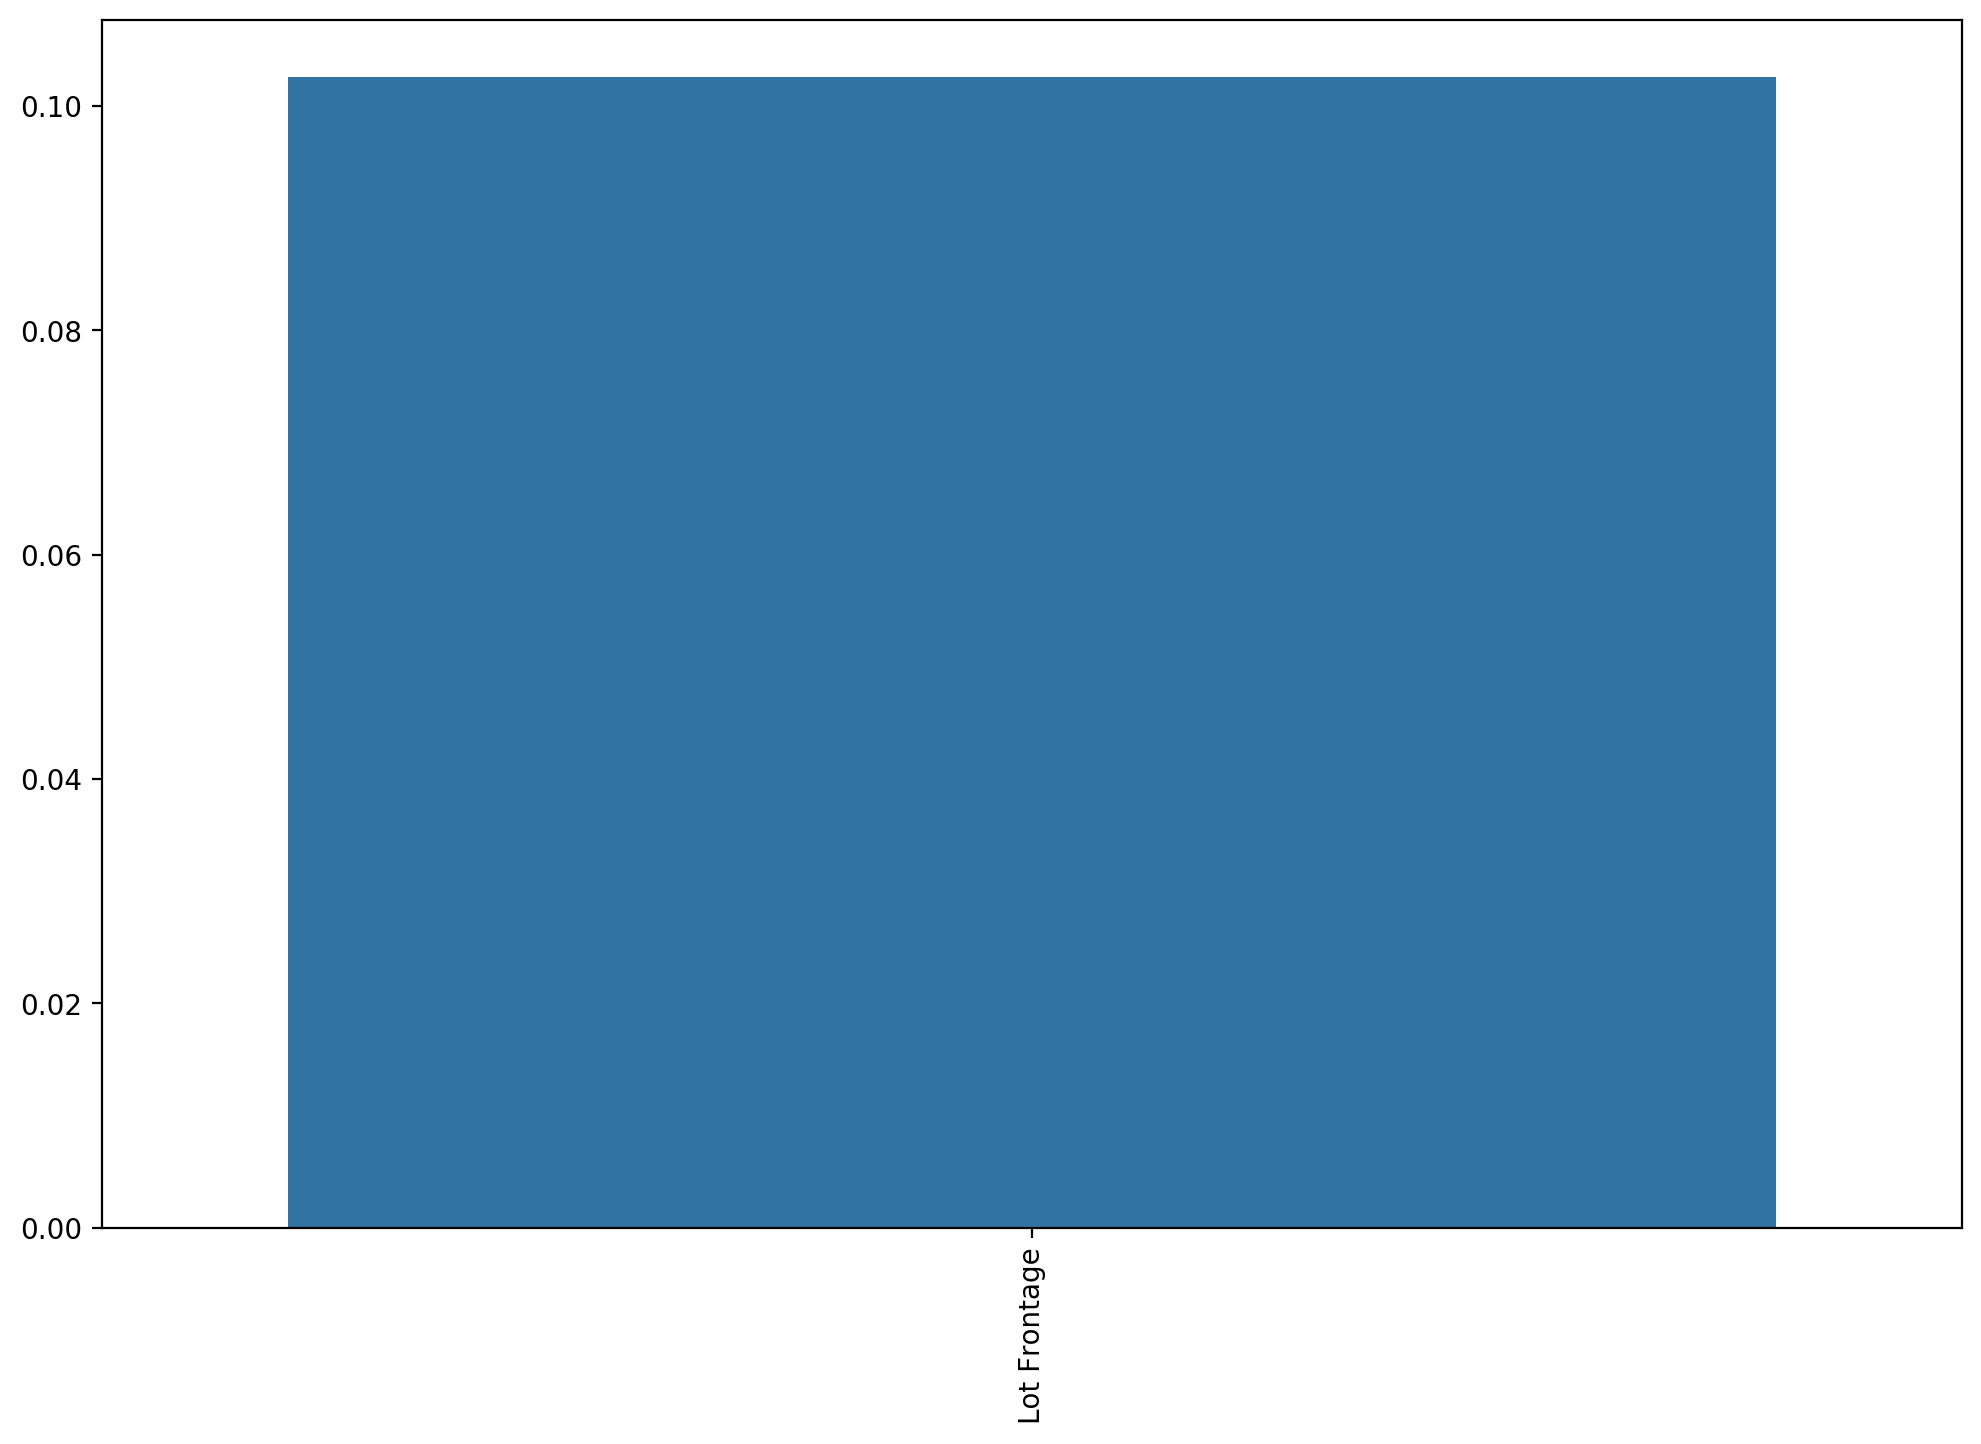

In [122]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

In [124]:
df['Lot Frontage'].isnull().sum()

3

In [127]:
df[df['Lot Frontage'].isnull()][['Neighborhood', 'Lot Frontage']]

,Neighborhood,Lot Frontage
2256,GrnHill,NaN
2788,Landmrk,NaN
2892,GrnHill,NaN


In [128]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [129]:
df['Lot Frontage'].isnull().sum()

0

In [130]:
df.to_csv("C:/Users/kaile/Desktop/Ames_NO_Missing_Data.csv",index=False)